# • DOMAIN: Medical

# • CONTEXT: Medical research university X is undergoing a deep research on patients with certain conditions. University has an internal AI team. Due to confidentiality the patient’s details and the conditions are masked by the client by providing different datasets to the AI team for developing a AIML model which can predict the condition of the patient depending on the received test results.

# • DATA DESCRIPTION: The data consists of biomechanics features of the patients according to their current conditions. Each patient is represented in the data set by six biomechanics attributes derived from the shape and orientation of the condition to their body part.

# • PROJECT OBJECTIVE: To Demonstrate the ability to fetch, process and leverage data to generate useful predictions by training Supervised Learning algorithms.

In [202]:
# Import necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import model_selection

# 1. Data Understanding:

# A. Read all the 3 CSV files as DataFrame and store them into 3 separate variables.

In [203]:
NORMAL_DF = pd.read_csv('Normal.csv')
TYPE_H_DF = pd.read_csv('Type_H.csv')
TYPE_S_DF = pd.read_csv('Type_S.csv')

In [204]:
print('FIRST 5 ROWS IN NORMAL_DF:\n\n',NORMAL_DF.head())

print('\n\nLAST 5 ROWS IN NORMAL_DF:\n\n',NORMAL_DF.tail())

FIRST 5 ROWS IN NORMAL_DF:

    P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree   Class
0    38.505273  16.964297  35.112814  21.540976  127.632875  7.986683  Normal
1    54.920858  18.968430  51.601455  35.952428  125.846646  2.001642  Normal
2    44.362490   8.945435  46.902096  35.417055  129.220682  4.994195  Normal
3    48.318931  17.452121  48.000000  30.866809  128.980308 -0.910941  Normal
4    45.701789  10.659859  42.577846  35.041929  130.178314 -3.388910  Normal


LAST 5 ROWS IN NORMAL_DF:

     P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree   Class
95    47.903565  13.616688  36.000000  34.286877  117.449062 -4.245395  Normal
96    53.936748  20.721496  29.220534  33.215251  114.365845 -0.421010  Normal
97    61.446597  22.694968  46.170347  38.751628  125.670725 -2.707880  Normal
98    45.252792   8.693157  41.583126  36.559635  118.545842  0.214750  Normal
99    33.841641   5.073991  36.641233  28.767649  123.945244 -0.199249  Normal

In [205]:
print('FIRST 5 ROWS IN TYPE_H_DF:\n\n',TYPE_H_DF.head())

print('\n\nLAST 5 ROWS IN TYPE_H_DF:\n\n',TYPE_H_DF.tail())

FIRST 5 ROWS IN TYPE_H_DF:

    P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree   Class
0    63.027817  22.552586  39.609117  40.475232   98.672917  -0.254400  Type_H
1    39.056951  10.060991  25.015378  28.995960  114.405425   4.564259  Type_H
2    68.832021  22.218482  50.092194  46.613539  105.985135  -3.530317  Type_H
3    69.297008  24.652878  44.311238  44.644130  101.868495  11.211523  Type_H
4    49.712859   9.652075  28.317406  40.060784  108.168725   7.918501  Type_H


LAST 5 ROWS IN TYPE_H_DF:

     P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree   Class
55    47.657730  13.277385  36.679985  34.380345   98.249781  6.273012  Type_H
56    43.349606   7.467469  28.065483  35.882137  112.776187  5.753277  Type_H
57    46.855781  15.351514  38.000000  31.504267  116.250917  1.662706  Type_H
58    43.203185  19.663146  35.000000  23.540039  124.846109 -2.919076  Type_H
59    48.109236  14.930725  35.564683  33.178512  124.056452  7.947905  

In [206]:
print('FIRST 5 ROWS IN TYPE_S_DF:\n\n',TYPE_S_DF.head())

print('\n\nLAST 5 ROWS IN TYPE_S_DF:\n\n',TYPE_S_DF.tail())

FIRST 5 ROWS IN TYPE_S_DF:

    P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree   Class
0    74.377678  32.053104  78.772013  42.324573  143.560690  56.125906  Type_S
1    89.680567  32.704435  83.130732  56.976132  129.955476  92.027277  Type_S
2    44.529051   9.433234  52.000000  35.095817  134.711772  29.106575  Type_S
3    77.690577  21.380645  64.429442  56.309932  114.818751  26.931841  Type_S
4    76.147212  21.936186  82.961502  54.211027  123.932010  10.431972  Type_S


LAST 5 ROWS IN TYPE_S_DF:

      P_incidence     P_tilt    L_angle    S_slope    P_radius    S_Degree  \
145    80.111572  33.942432  85.101608  46.169139  125.593624  100.292107   
146    95.480229  46.550053  59.000000  48.930176   96.683903   77.283072   
147    74.094731  18.823727  76.032156  55.271004  128.405731   73.388216   
148    87.679087  20.365613  93.822416  67.313473  120.944829   76.730629   
149    48.259920  16.417462  36.329137  31.842457   94.882336   28.343799   

    

# B. Print Shape and columns of all the 3 DataFrames.

In [207]:
print('SHAPE OF NORMAL_DF:\n',NORMAL_DF.shape)
print('\nSHAPE OF TYPE_H_DF:\n',TYPE_H_DF.shape)
print('\nSHAPE OF TYPE_S_DF:\n',TYPE_S_DF.shape)

SHAPE OF NORMAL_DF:
 (100, 7)

SHAPE OF TYPE_H_DF:
 (60, 7)

SHAPE OF TYPE_S_DF:
 (150, 7)


-> NORMAL_DF HAS 100 ROWS AND 7 COLUMNS

-> TYPE_H_DF HAS 60 ROWS AND 7 COLUMNS

-> TYPE_S_DF HAS 150 ROWS AND 7 COLUMNS

In [208]:
print('COLUMNS IN NORMAL_DF:\n',NORMAL_DF.columns)
print('\n\nCOLUMNS IN TYPE_H_DF:\n',TYPE_H_DF.columns)
print('\n\nCOLUMNS IN TYPE_S_DF:\n',TYPE_S_DF.columns)

COLUMNS IN NORMAL_DF:
 Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')


COLUMNS IN TYPE_H_DF:
 Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')


COLUMNS IN TYPE_S_DF:
 Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')


# C. Compare Column names of all the 3 DataFrames and clearly write observations.

-> From the above code block, we can observe that all the three data frames has same column names.

-> Class column differentiates whether patient belongs to NORMAL or TYPE_H or TYPE_S

-> Other columns in all the 3 data frames are having floating values

# D. Print DataTypes of all the 3 DataFrames.

In [209]:
print('DATA TYPES IN NORMAL_DF:\n',NORMAL_DF.dtypes)
print('\n\nDATA TYPES IN TYPE_H_DF:\n',TYPE_H_DF.dtypes)
print('\n\nDATA TYPES IN TYPE_S_DF:\n',TYPE_S_DF.dtypes)

DATA TYPES IN NORMAL_DF:
 P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object


DATA TYPES IN TYPE_H_DF:
 P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object


DATA TYPES IN TYPE_S_DF:
 P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object


# E. Observe and share variation in ‘Class’ feature of all the 3 DaraFrames.

In [210]:
print('VALUES PRESENT IN CLASS COLUMN OF NORMAL_DF:\n',NORMAL_DF['Class'].unique())
print('\n\nVALUES PRESENT IN CLASS COLUMN OF TYPE_H_DF:\n',TYPE_H_DF['Class'].unique())
print('\n\nVALUES PRESENT IN CLASS COLUMN OF TYPE_S_DF:\n',TYPE_S_DF['Class'].unique())

VALUES PRESENT IN CLASS COLUMN OF NORMAL_DF:
 ['Normal' 'Nrmal']


VALUES PRESENT IN CLASS COLUMN OF TYPE_H_DF:
 ['Type_H' 'type_h']


VALUES PRESENT IN CLASS COLUMN OF TYPE_S_DF:
 ['Type_S' 'tp_s']


-> In all the 3 Data Frames, Class column is of Object data type

-> Class column identifies whether a patient belongs to NORMAL or TYPE_H or TYPE_S class

-> Normal & Nrmal, Type_H & type_h, Type_S & tp_s represents same class but with different names. we can convert them to unique for each Class.

# 2. Data Preparation and Exploration:

# A. Unify all the variations in ‘Class’ feature for all the 3 DataFrames.

In [211]:
NORMAL_DF.loc[NORMAL_DF['Class']=='Nrmal','Class']='Normal'
TYPE_H_DF.loc[TYPE_H_DF['Class']=='type_h','Class']='Type_H'
TYPE_S_DF.loc[TYPE_S_DF['Class']=='tp_s','Class']='Type_S'

In [212]:
print('VALUES PRESENT IN CLASS COLUMN OF NORMAL_DF:\n',NORMAL_DF['Class'].unique())
print('\n\nVALUES PRESENT IN CLASS COLUMN OF TYPE_H_DF:\n',TYPE_H_DF['Class'].unique())
print('\n\nVALUES PRESENT IN CLASS COLUMN OF TYPE_S_DF:\n',TYPE_S_DF['Class'].unique())

VALUES PRESENT IN CLASS COLUMN OF NORMAL_DF:
 ['Normal']


VALUES PRESENT IN CLASS COLUMN OF TYPE_H_DF:
 ['Type_H']


VALUES PRESENT IN CLASS COLUMN OF TYPE_S_DF:
 ['Type_S']


-> Now we have single value for each type of Class like 'Normal', 'Type_H' and 'Type_S'

# B. Combine all the 3 DataFrames to form a single DataFrame

In [213]:
PCDATA = NORMAL_DF.append([TYPE_H_DF,TYPE_S_DF])

PCDATA.reset_index(level=0, inplace=True)

PCDATA.drop(['index'],axis=1,inplace=True)

print('SHAPE OF THE APPENDED DATA SET:\n',PCDATA.shape)

SHAPE OF THE APPENDED DATA SET:
 (310, 7)


-> We have appended the NORMAL_DF, TYPE_H_DF, TYPE_S_DF into single Data frame named PCDATA.

-> PCDATA dataframe contains 310 Rows and 7 Columns.

# C. Print 5 random samples of this DataFrame

In [214]:
print('RANDOM 5 SAMPLES FROM PCDATA: \n\n',PCDATA.sample(5))

RANDOM 5 SAMPLES FROM PCDATA: 

      P_incidence     P_tilt   L_angle    S_slope    P_radius   S_Degree  \
290    43.718262   9.811985  52.00000  33.906277   88.434242  40.880923   
151    74.433593  41.557331  27.70000  32.876262  107.949304   5.000089   
143    66.285394  26.327845  47.50000  39.957549  121.219684  -0.799624   
162    44.529051   9.433234  52.00000  35.095817  134.711772  29.106575   
93     34.382299   2.062683  32.39082  32.319617  128.300199  -3.365516   

      Class  
290  Type_S  
151  Type_H  
143  Type_H  
162  Type_S  
93   Normal  


# D. Print Feature-wise percentage of Null values.

In [215]:
print(PCDATA.isnull().sum())

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64


-> There are no null values present in the data frame.

# E. Check 5-point summary of the new DataFrame.

In [216]:
PCDATA['Class'] = PCDATA['Class'].astype('category')
print(PCDATA.describe())

       P_incidence      P_tilt     L_angle     S_slope    P_radius    S_Degree
count   310.000000  310.000000  310.000000  310.000000  310.000000  310.000000
mean     60.496653   17.542822   51.930930   42.953831  117.920655   26.296694
std      17.236520   10.008330   18.554064   13.423102   13.317377   37.559027
min      26.147921   -6.554948   14.000000   13.366931   70.082575  -11.058179
25%      46.430294   10.667069   37.000000   33.347122  110.709196    1.603727
50%      58.691038   16.357689   49.562398   42.404912  118.268178   11.767934
75%      72.877696   22.120395   63.000000   52.695888  125.467674   41.287352
max     129.834041   49.431864  125.742385  121.429566  163.071041  418.543082


-> Except for S_Degree column, mean and median is almost similar for the other columns

-> For P_incidence, 25% values are less than 26.14 and 75% values are less than 72.87 and max value is at 129.83

-> For P_tilt, 25% values are less than 10.66 and 75% values are less than 22.12, max value is 49.43. This columns also contains negative values.

-> For L_angle, 25% values are less than 14 and 75% values are less than 63, max value is at 125.74

-> For S_slope, 25% values are less than 33.34 and 75% values are less than 52.69, max value is at 121.42

-> For P_radius, 25% values are less than 110.70 and 75% values are less than 125.46, max value is at 163.07

-> For S_Degree, 25% values are less than 1.6 and 75% values are less than 41.28, max value is at 418.54

-> Data might be normally distributed for all columns except S_Degree.

-> S_Degree is heavily skewed towards right and there are presense of outliers in the data due to huge gap between 75% value and max value.

# 3. Data Analysis:

# A. Visualize a heatmap to understand correlation between all features

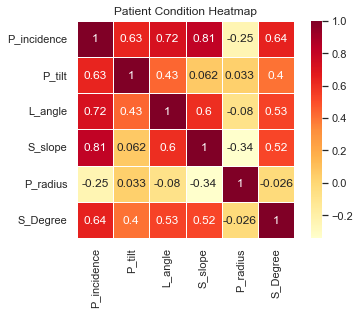

In [217]:
ax = sns.heatmap(PCDATA.corr(), annot = True, linewidths = 1, square = True, cmap="YlOrRd")

plt.title("Patient Condition Heatmap")

plt. show()

#PCDATA.corr()

# B. Share insights on correlation.

# A. Features having stronger correlation with correlation value.

    Correlation between S_slope, P_incidence - 0.81
    
    Correlation between L_angle and P_incidence - 0.72
    
    Correlation between S_degree and P_incidence - 0.64
    
# B. Features having weaker correlation with correlation value.

    Correlation between S_Degree and P_radius - -0.02

# C. Visualize a pairplot with 3 classes distinguished by colors and share insights.

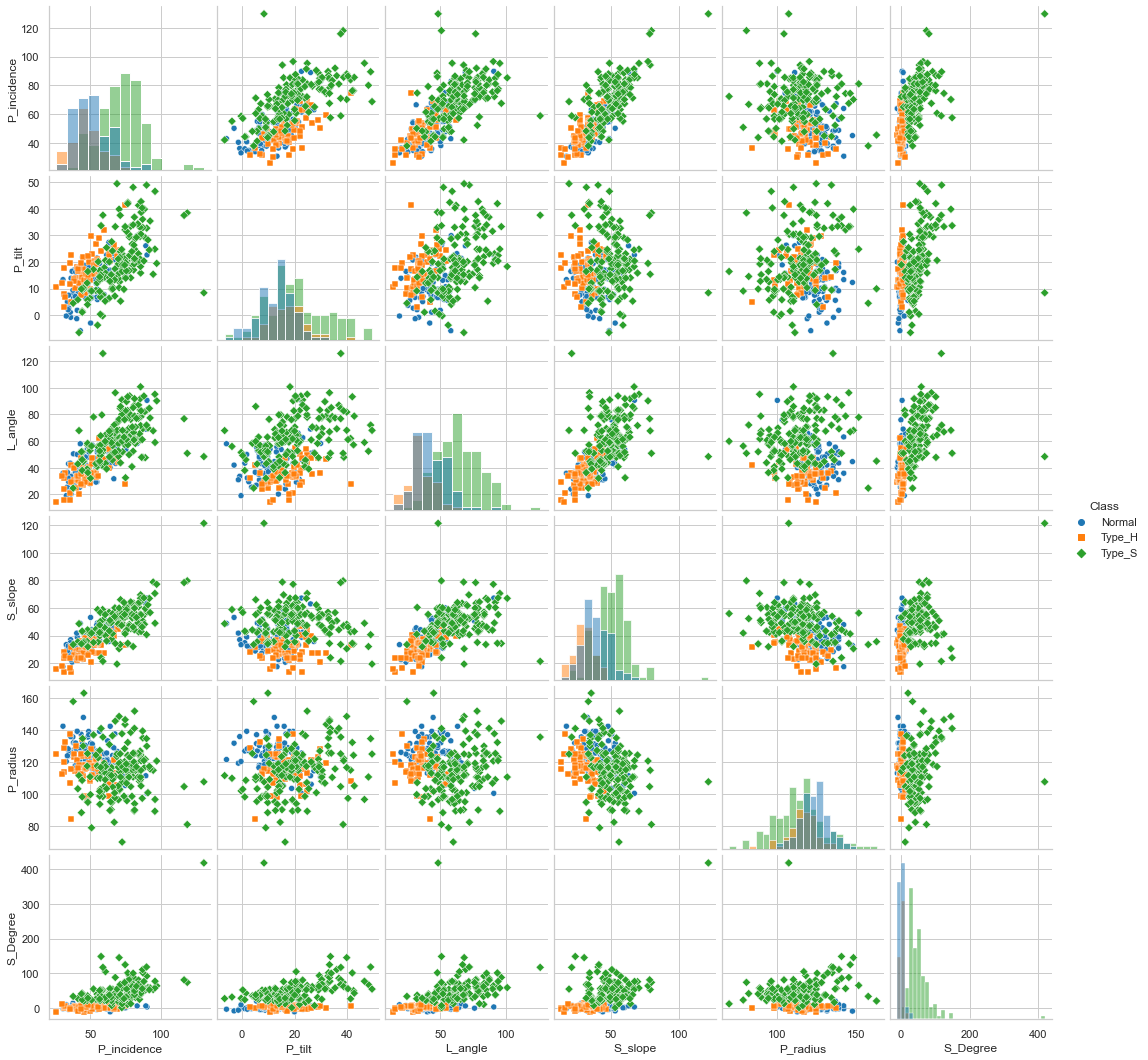

In [218]:
sns.pairplot(PCDATA, hue = "Class", diag_kind = "hist",markers=["o", "s", "D"],palette = "tab10")

    * Along the diagonal, we can see the distribution of the individual variable
    * Data is not distributed similarly for three classes along the diagonal
    * From the plotting, we can see that Type_S is more than Type_H and Normal
    
    

# D. Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights.

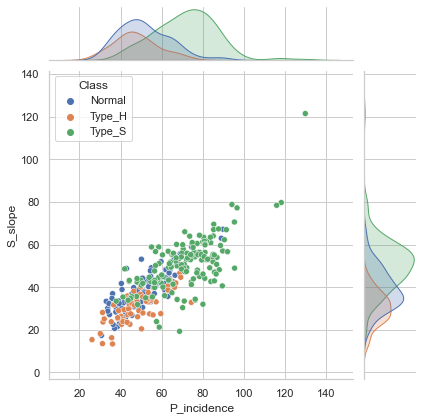

In [219]:
sns.jointplot(x="P_incidence",y="S_slope",data=PCDATA,hue="Class",marker="o")
plt.show()

     * From the above joint plot, we can say that both the variables are highly correlated
     * On applying hue using Class column, we can see that Type_S are more compared to Type_H and Normal.
     * Outliers are significantly less as displayed in the plot.

# E. Visualize a boxplot to check distribution of the features and share insights.

In [220]:
PCDATA.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

<Figure size 936x432 with 0 Axes>

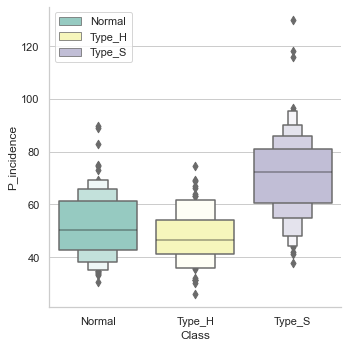

In [221]:
# Visualizaion of P_Incidence using BOXPLOT

plt.figure(figsize=(13,6))

sns.set_theme(style="whitegrid")

sns.catplot(x='Class', y='P_incidence', data= PCDATA, hue = 'Class', palette="Set3", kind = "boxen", dodge = False)

plt.legend()

plt.show()

    * P_incidence value is higher for Type_S and low for Type_H where as for Normal Class, P_incidence value is 
        slightly higher than Type_H class.
    * There are less number of outliers for the data

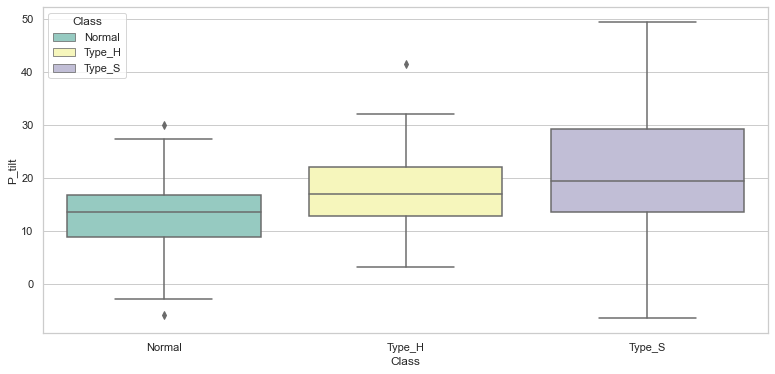

In [222]:
# Visualizaion of P_tilt using BOXPLOT

plt.figure(figsize=(13,6))

sns.set_theme(style="whitegrid")

sns.boxplot(x='Class', y='P_tilt', data= PCDATA, hue = 'Class', palette="Set3", dodge = False)

plt.show()

    * P_tilt value is very high for Type_S and low for Normal class where as for Type_H Class, P_tilt value is slightly
        higher than Normal class.
    * There are less number of outliers for the data

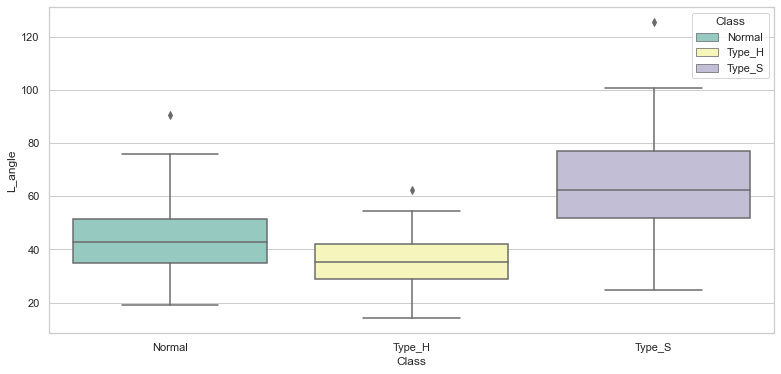

In [223]:
# Visualizaion of L_angle using BOXPLOT

plt.figure(figsize=(13,6))

sns.set_theme(style="whitegrid")

sns.boxplot(x='Class', y='L_angle', data= PCDATA, hue = 'Class', palette="Set3", dodge = False)

plt.show()

    * L_angle value is very high for Type_S and low for Type_H class where as for Normal Class, L_angle value is 
        slightly higher than Type_H class.
    * There are less number of outliers for the data and outlier value is very high than median.

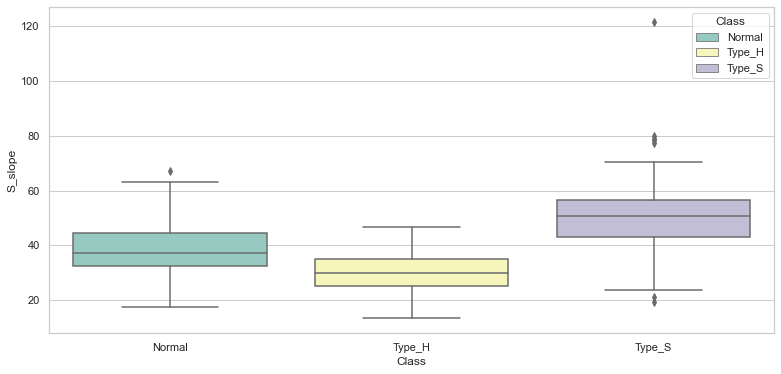

In [224]:
# Visualizaion of S_slope using BOXPLOT

plt.figure(figsize=(13,6))

sns.set_theme(style="whitegrid")

sns.boxplot(x='Class', y='S_slope', data= PCDATA, hue = 'Class', palette="Set3", dodge = False)

plt.show()

    * S_slope value is very high for Type_S and low for Type_H class where as for Normal Class, S_slope value is 
        slightly higher than Type_H class.
    * There are less number of outliers for the data but the max value is much higher than the median value.

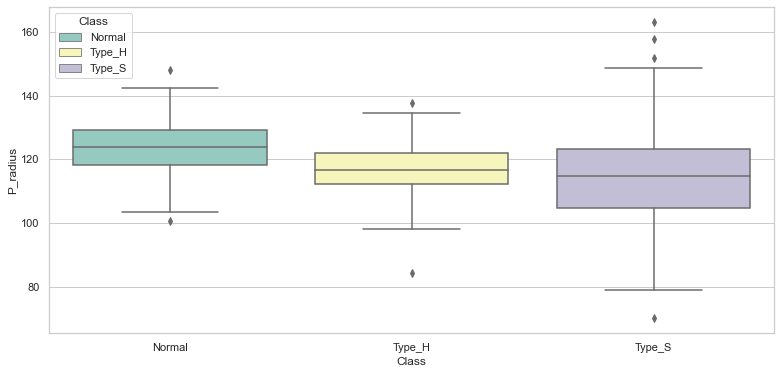

In [225]:
# Visualizaion of P_radius using BOXPLOT

plt.figure(figsize=(13,6))

sns.set_theme(style="whitegrid")

sns.boxplot(x='Class', y='P_radius', data= PCDATA, hue = 'Class', palette="Set3", dodge = False)

plt.show()

    * P_radius value is very high for Type_S and low for Type_H class where as for Normal Class, P_radius value is 
        slightly higher than Type_H class.
    * There are less number of outliers for the data but the max value is much higher than the median value.
    * Type_S also has very low / min value for the P_radius

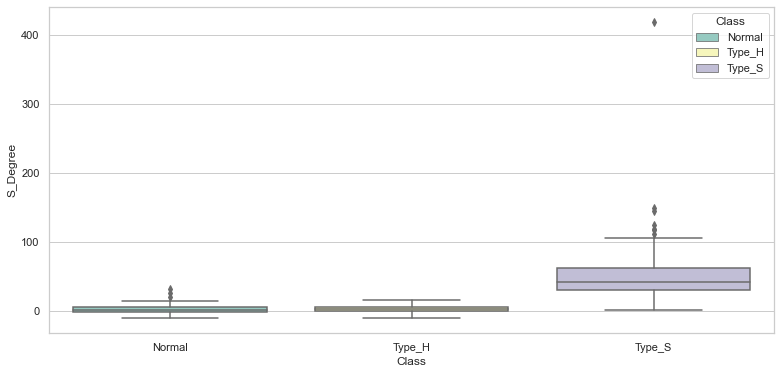

In [226]:
# Visualizaion of S_Degree using BOXPLOT

plt.figure(figsize=(13,6))

sns.set_theme(style="whitegrid")

sns.boxplot(x='Class', y='S_Degree', data= PCDATA, hue = 'Class', palette="Set3", dodge = False)

plt.show()

    * Type_S class has max value for S_Degree and also way higher than median.
    * There are negative values present for Normal and Type_H class for S_Degree value

# 4. Model Building:

# A. Split data into X and Y.

In [227]:
# We are splitting the data into Independent and Dependent Variables.

# All the columns except Class column are independent Variables and are assigned to X and 

# Dependent Variable Class is assigned to Y which is our target class

X=PCDATA.drop(columns='Class')

Y=PCDATA['Class']

In [228]:
print(X.describe())

       P_incidence      P_tilt     L_angle     S_slope    P_radius    S_Degree
count   310.000000  310.000000  310.000000  310.000000  310.000000  310.000000
mean     60.496653   17.542822   51.930930   42.953831  117.920655   26.296694
std      17.236520   10.008330   18.554064   13.423102   13.317377   37.559027
min      26.147921   -6.554948   14.000000   13.366931   70.082575  -11.058179
25%      46.430294   10.667069   37.000000   33.347122  110.709196    1.603727
50%      58.691038   16.357689   49.562398   42.404912  118.268178   11.767934
75%      72.877696   22.120395   63.000000   52.695888  125.467674   41.287352
max     129.834041   49.431864  125.742385  121.429566  163.071041  418.543082


In [229]:
print(Y.describe())

count        310
unique         3
top       Type_S
freq         150
Name: Class, dtype: object


# B. Split data into train and test with 80:20 proportion.

In [230]:
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X, Y, test_size=0.20, random_state=10)

In [231]:
print('FIRST 5 RECORDS IN INDEPENDENT VARIABLE X FOR TRAIN DATA:\n\n',X_TRAIN.head())

print('\n\nLAST 5 RECORDS IN INDEPENDENT VARIABLE X FOR TRAIN DATA:\n\n',X_TRAIN.tail())

FIRST 5 RECORDS IN INDEPENDENT VARIABLE X FOR TRAIN DATA:

      P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree
267    72.343594  16.420790  59.869012  55.922805   70.082575  12.072644
290    43.718262   9.811985  52.000000  33.906277   88.434242  40.880923
209    68.613001  15.082235  63.014696  53.530766  123.431174  39.497987
92     54.600316  21.488974  29.360216  33.111342  118.343321  -1.471067
194    94.174822  15.380770  67.705721  78.794052  114.890113  53.255220


LAST 5 RECORDS IN INDEPENDENT VARIABLE X FOR TRAIN DATA:

      P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree
156    43.349606   7.467469  28.065483  35.882137  112.776187   5.753277
123    45.540790  13.069598  30.298321  32.471192  117.980830  -4.987130
15     59.726140   7.724873  55.343485  52.001268  125.174221   3.235159
125    54.124920  26.650489  35.329747  27.474432  121.447011   1.571205
265    83.703177  20.268229  77.110598  63.434949  125.480174  69.279571


In [232]:
print('FIRST 5 RECORDS IN INDEPENDENT VARIABLE X FOR TEST DATA:\n\n',X_TEST.head())

print('\n\nLAST 5 RECORDS IN INDEPENDENT VARIABLE X FOR TEST DATA:\n\n',X_TEST.tail())

FIRST 5 RECORDS IN INDEPENDENT VARIABLE X FOR TEST DATA:

      P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree
131    46.390260  11.079047  32.136553  35.311213   98.774546   6.386832
294    72.643850  18.929117  68.000000  53.714733  116.963416  25.384247
188    56.605771  16.800200  42.000000  39.805571  127.294522  24.018575
229    77.236898  16.737622  49.775534  60.499275  110.690377  39.787154
240    69.563486  15.401139  74.438497  54.162347  105.067356  29.701211


LAST 5 RECORDS IN INDEPENDENT VARIABLE X FOR TEST DATA:

      P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree
36     46.637864  15.853717  40.000000  30.784147  119.377603  9.064582
10     44.489275  21.786433  31.474154  22.702842  113.778494 -0.284129
80     36.422485  13.879424  20.242562  22.543061  126.076861  0.179717
64     43.191915   9.976664  28.938149  33.215251  123.467400  1.741018
113    53.572170  20.460828  33.100000  33.111342  110.966698  7.044803


In [233]:
print('FIRST 5 RECORDS IN DEPENDENT VARIABLE Y FOR TRAIN DATA:\n\n',Y_TRAIN.head())

print('\n\nLAST 5 RECORDS IN DEPENDENT VARIABLE Y FOR TRAIN DATA:\n\n',Y_TRAIN.tail())

FIRST 5 RECORDS IN DEPENDENT VARIABLE Y FOR TRAIN DATA:

 267    Type_S
290    Type_S
209    Type_S
92     Normal
194    Type_S
Name: Class, dtype: category
Categories (3, object): ['Normal', 'Type_H', 'Type_S']


LAST 5 RECORDS IN DEPENDENT VARIABLE Y FOR TRAIN DATA:

 156    Type_H
123    Type_H
15     Normal
125    Type_H
265    Type_S
Name: Class, dtype: category
Categories (3, object): ['Normal', 'Type_H', 'Type_S']


In [234]:
print('FIRST 5 RECORDS IN DEPENDENT VARIABLE Y FOR TEST DATA:\n\n',Y_TEST.head())

print('\n\nLAST 5 RECORDS IN DEPENDENT VARIABLE Y FOR TEST DATA:\n\n',Y_TEST.tail())

FIRST 5 RECORDS IN DEPENDENT VARIABLE Y FOR TEST DATA:

 131    Type_H
294    Type_S
188    Type_S
229    Type_S
240    Type_S
Name: Class, dtype: category
Categories (3, object): ['Normal', 'Type_H', 'Type_S']


LAST 5 RECORDS IN DEPENDENT VARIABLE Y FOR TEST DATA:

 36     Normal
10     Normal
80     Normal
64     Normal
113    Type_H
Name: Class, dtype: category
Categories (3, object): ['Normal', 'Type_H', 'Type_S']


# C. Train a Supervised Learning Classification base model using KNN classifier.

In [235]:
# We are going to build the supervised learning classification using KNN Classifier having 9 Neighbours and euclidian distance

KNN = KNeighborsClassifier(n_neighbors= 9 , metric = 'euclidean' )

In [236]:
KNN.fit(X_TRAIN, Y_TRAIN)
PREDICTED = KNN.predict(X_TEST)

In [237]:
print('TRAINING DATA ACCURACY USING KNN CLASSIFIER:',KNN.score(X_TRAIN, Y_TRAIN) )
print('TESTING DATA ACCURACY USING KNN CLASSIFIER:',KNN.score(X_TEST, Y_TEST) )

TRAINING DATA ACCURACY USING KNN CLASSIFIER: 0.8911290322580645
TESTING DATA ACCURACY USING KNN CLASSIFIER: 0.7580645161290323


    * ACCURACY FOR TRAINING DATA IS 89.11% AS COMPARED TO TESTING DATA ACCURACY WHICH IS 75.80% WHICH IS LESS THAN THE TRAINING DATA ACCURACY WHICH MIGHT BE DUE TO OVERFITTING OF THE DATA.

# D. Print all the possible performance metrics for both train and test data.

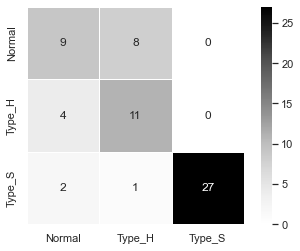

In [238]:
# Building Confusion Matrix

CONF_MATX = confusion_matrix(Y_TEST, PREDICTED)

# Building Data Frame for Confusion Matrix

DF_CONFMATX = pd.DataFrame(CONF_MATX, index = [i for i in ["Normal","Type_H","Type_S"]],
                           columns = [i for i in ["Normal","Type_H","Type_S"]])

sns.heatmap(DF_CONFMATX, annot=True, square = True, fmt = "d", cmap="Greys", linewidths = 1)

plt.show()

    * Conclusions from the above Confusion Matrix:
    
        * Type_S Class is predicted correctly most of the time.
        * Type_H Class is has less mis-classifications compared to predicting correctly
        * Normal Class is having more mis-predictions as Type_H and are more compared to Type_H and Type_S.

In [239]:
# Classification Matrix

CLSSN_REP = classification_report(Y_TEST,PREDICTED)

print('CLASSIFICATION REPORT:\n\n',CLSSN_REP)

CLASSIFICATION REPORT:

               precision    recall  f1-score   support

      Normal       0.60      0.53      0.56        17
      Type_H       0.55      0.73      0.63        15
      Type_S       1.00      0.90      0.95        30

    accuracy                           0.76        62
   macro avg       0.72      0.72      0.71        62
weighted avg       0.78      0.76      0.76        62



    * Precision: Precision is the ratio that defines predicted positive observations to the total predicted
        positive observations.
        
        Precision for Type_S class is very high indicates almost all predicted observations of this class are 
            correct followed by Normal class which is 60% and Type_H at 55%.
        
    * Recall: It's the ratio of observations that are predicted correctly to all the observations in that actuall class.
        Recall  value is high for Type_S followed by Type_H and finally Normal. It says out of all predictions for 
        a Type_S class, 90% of the observations are predicted correctly.
        
    * F1-Score: It's the average of precision and recall.
        In our model, precision and recall is balanced at 0-95% for Type_S, 0-63% for Type_H and 0-56% for Normal Class.
        
    * Type_S has maximum score for all the metrics.

# 5. Performance Improvement:

# A. Experiment with various parameters to improve performance of the base model.

In [242]:
# Define parameters to use with KNN classifier for tuning.

from sklearn.model_selection import GridSearchCV

HYPER_PARAMS = { 'n_neighbors' : [5,7,9,11,13,15,17,19,21,23,25,27],'weights' : ['uniform','distance'],
                'metric' : ['minkowski','euclidean','manhattan','chebyshev']}

GRID_SEARCH = GridSearchCV(KNeighborsClassifier(), HYPER_PARAMS, verbose = 1, cv=3, n_jobs = -1)

GRID_RES = GRID_SEARCH.fit(X_TRAIN,Y_TRAIN)

print("BEST SCORE AFTER TUNING THE KNN MODEL:",GRID_RES.best_score_)

print("\nBEST PARAMETERS FOR THE KNN MODEL AFTER TUNING:\n",GRID_RES.best_params_)

Fitting 3 folds for each of 96 candidates, totalling 288 fits
BEST SCORE AFTER TUNING THE KNN MODEL: 0.8507689293760407

BEST PARAMETERS FOR THE KNN MODEL AFTER TUNING:
 {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}


    ** We can say that our base model is having high performance at 11 neighbors using manhattan distance.

In [249]:
# Let us analyse the model using various values for n_neghbours and deduce a best value for it.

# Define arrays to store the score values of TEST Data and TRAIN Data

TRAIN_SCORE = []
TEST_SCORE = []

for k in range(1,61):
    KNN = KNeighborsClassifier(n_neighbors= k , metric = 'euclidean')
    KNN.fit(X_TRAIN,Y_TRAIN)
    TRAIN_SCORE.append(KNN.score(X_TRAIN,Y_TRAIN))
    TEST_SCORE.append(KNN.score(X_TEST,Y_TEST))

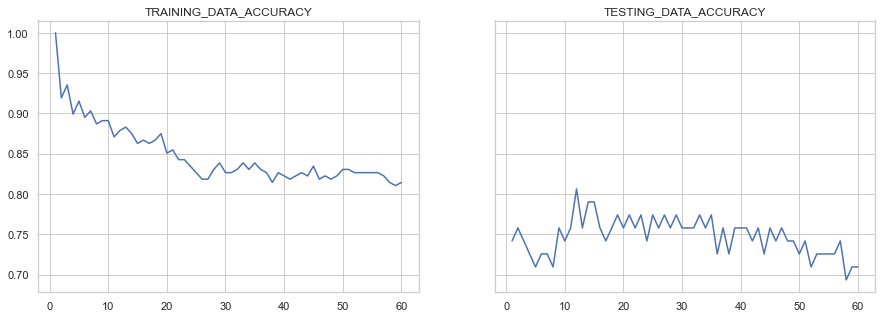

In [250]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

sns.lineplot(x=range(1,61),y=TRAIN_SCORE,ax=axes[0])

sns.lineplot(x=range(1,61),y=TEST_SCORE,ax=axes[1])

axes[0].set_title("TRAINING_DATA_ACCURACY")

axes[1].set_title("TESTING_DATA_ACCURACY")

plt.show()

    * With increase in K value, training data accuracy is decreasing.
    * Testing Data accuracy is at max at K Value less than 15.

In [251]:
for i in range(1,20,2):
    KNN = KNeighborsClassifier(n_neighbors=i, metric = 'euclidean')
    KNN.fit(X_TRAIN,Y_TRAIN)
    PREDICTED = KNN.predict(X_TEST)
    print('TRAINING DATA ACCURACY FOR K VALUE AT {} IS {}:'.format(i,KNN.score(X_TRAIN,Y_TRAIN)))
    print('TESTING DATA ACCURACY FOR K VALUE AT {} IS {}:'.format(i,KNN.score(X_TEST,Y_TEST)))
    print('CLASSIFICATION MATRIX:\n',classification_report(Y_TEST,PREDICTED))

TRAINING DATA ACCURACY FOR K VALUE AT 1 IS 1.0:
TESTING DATA ACCURACY FOR K VALUE AT 1 IS 0.7419354838709677:
CLASSIFICATION MATRIX:
               precision    recall  f1-score   support

      Normal       0.57      0.47      0.52        17
      Type_H       0.53      0.67      0.59        15
      Type_S       0.97      0.93      0.95        30

    accuracy                           0.74        62
   macro avg       0.69      0.69      0.68        62
weighted avg       0.75      0.74      0.74        62

TRAINING DATA ACCURACY FOR K VALUE AT 3 IS 0.9354838709677419:
TESTING DATA ACCURACY FOR K VALUE AT 3 IS 0.7419354838709677:
CLASSIFICATION MATRIX:
               precision    recall  f1-score   support

      Normal       0.57      0.47      0.52        17
      Type_H       0.53      0.67      0.59        15
      Type_S       0.97      0.93      0.95        30

    accuracy                           0.74        62
   macro avg       0.69      0.69      0.68        62
weighted a

    * At K Value 9, Precision value for Type_S becomes 1.
    * At K Value 15, TESTING DATA is more accurate compared to the TRAINING DATA with over 90%
    * At K Value 5, TESTING DATA is less accurate compared to the TRAINING DATA with less than 80%.
    * Eventhough at K Value 9, precision for Type_S becomes 100%, at K Value 15, data seems to be more balanced. 

In [252]:
for i in range(1,20,2):
    KNN = KNeighborsClassifier(n_neighbors=i, metric = 'manhattan')
    KNN.fit(X_TRAIN,Y_TRAIN)
    PREDICTED = KNN.predict(X_TEST)
    print('TRAINING DATA ACCURACY FOR K VALUE AT {} IS {}:'.format(i,KNN.score(X_TRAIN,Y_TRAIN)))
    print('TESTING DATA ACCURACY FOR K VALUE AT {} IS {}:'.format(i,KNN.score(X_TEST,Y_TEST)))
    print('CLASSIFICATION MATRIX:\n',classification_report(Y_TEST,PREDICTED))

TRAINING DATA ACCURACY FOR K VALUE AT 1 IS 1.0:
TESTING DATA ACCURACY FOR K VALUE AT 1 IS 0.7741935483870968:
CLASSIFICATION MATRIX:
               precision    recall  f1-score   support

      Normal       0.59      0.59      0.59        17
      Type_H       0.65      0.73      0.69        15
      Type_S       0.96      0.90      0.93        30

    accuracy                           0.77        62
   macro avg       0.73      0.74      0.74        62
weighted avg       0.78      0.77      0.78        62

TRAINING DATA ACCURACY FOR K VALUE AT 3 IS 0.9314516129032258:
TESTING DATA ACCURACY FOR K VALUE AT 3 IS 0.8064516129032258:
CLASSIFICATION MATRIX:
               precision    recall  f1-score   support

      Normal       0.69      0.65      0.67        17
      Type_H       0.61      0.73      0.67        15
      Type_S       1.00      0.93      0.97        30

    accuracy                           0.81        62
   macro avg       0.77      0.77      0.77        62
weighted a

In [253]:
for i in range(11,30,2):
    KNN = KNeighborsClassifier(n_neighbors=i, metric = 'chebyshev')
    KNN.fit(X_TRAIN,Y_TRAIN)
    PREDICTED = KNN.predict(X_TEST)
    print('TRAINING DATA ACCURACY FOR K VALUE AT {} IS {}:'.format(i,KNN.score(X_TRAIN,Y_TRAIN)))
    print('TESTING DATA ACCURACY FOR K VALUE AT {} IS {}:'.format(i,KNN.score(X_TEST,Y_TEST)))
    print('CLASSIFICATION MATRIX:\n',classification_report(Y_TEST,PREDICTED))

TRAINING DATA ACCURACY FOR K VALUE AT 11 IS 0.8588709677419355:
TESTING DATA ACCURACY FOR K VALUE AT 11 IS 0.7580645161290323:
CLASSIFICATION MATRIX:
               precision    recall  f1-score   support

      Normal       0.58      0.65      0.61        17
      Type_H       0.56      0.60      0.58        15
      Type_S       1.00      0.90      0.95        30

    accuracy                           0.76        62
   macro avg       0.71      0.72      0.71        62
weighted avg       0.78      0.76      0.77        62

TRAINING DATA ACCURACY FOR K VALUE AT 13 IS 0.8548387096774194:
TESTING DATA ACCURACY FOR K VALUE AT 13 IS 0.7419354838709677:
CLASSIFICATION MATRIX:
               precision    recall  f1-score   support

      Normal       0.56      0.59      0.57        17
      Type_H       0.53      0.60      0.56        15
      Type_S       1.00      0.90      0.95        30

    accuracy                           0.74        62
   macro avg       0.69      0.70      0.69  

In [254]:
for i in range(1,20,2):
    KNN = KNeighborsClassifier(n_neighbors=i, metric = 'minkowski')
    KNN.fit(X_TRAIN,Y_TRAIN)
    PREDICTED = KNN.predict(X_TEST)
    print('TRAINING DATA ACCURACY FOR K VALUE AT {} IS {}:'.format(i,KNN.score(X_TRAIN,Y_TRAIN)))
    print('TESTING DATA ACCURACY FOR K VALUE AT {} IS {}:'.format(i,KNN.score(X_TEST,Y_TEST)))
    print('CLASSIFICATION MATRIX:\n',classification_report(Y_TEST,PREDICTED))

TRAINING DATA ACCURACY FOR K VALUE AT 1 IS 1.0:
TESTING DATA ACCURACY FOR K VALUE AT 1 IS 0.7419354838709677:
CLASSIFICATION MATRIX:
               precision    recall  f1-score   support

      Normal       0.57      0.47      0.52        17
      Type_H       0.53      0.67      0.59        15
      Type_S       0.97      0.93      0.95        30

    accuracy                           0.74        62
   macro avg       0.69      0.69      0.68        62
weighted avg       0.75      0.74      0.74        62

TRAINING DATA ACCURACY FOR K VALUE AT 3 IS 0.9354838709677419:
TESTING DATA ACCURACY FOR K VALUE AT 3 IS 0.7419354838709677:
CLASSIFICATION MATRIX:
               precision    recall  f1-score   support

      Normal       0.57      0.47      0.52        17
      Type_H       0.53      0.67      0.59        15
      Type_S       0.97      0.93      0.95        30

    accuracy                           0.74        62
   macro avg       0.69      0.69      0.68        62
weighted a

# B. Clearly showcase improvement in performance achieved.

    *Using "CHEBYSHEV" metric:
        Accuracy at K Value 5 is 77% compared to K Value at 3 which is 71% which is increased by 8.45%
        Precision for Normal Class at K Value 5 is increased by 24% over K Value 3
        Precision for Type_H Class at K Value 5 is increased by 14.5% over K Value 3
        Precision for Type_S Class became 100% at K Value 5

    * Using "EUCLIDEAN" metric:
        Precision for Normal Class at K Valie 15 is increased by 10% over K Value 13
        Precision for Type_H Class at K Value 15 is increased by 9% over K Value 13
        Accuracy at K Value 15 is increased by 4% over K Value 13
        Even though performance of TRAINING DATA at K Value 13 is reduced by 2.2%, performance of TEST DATA is increased 
        by  40%


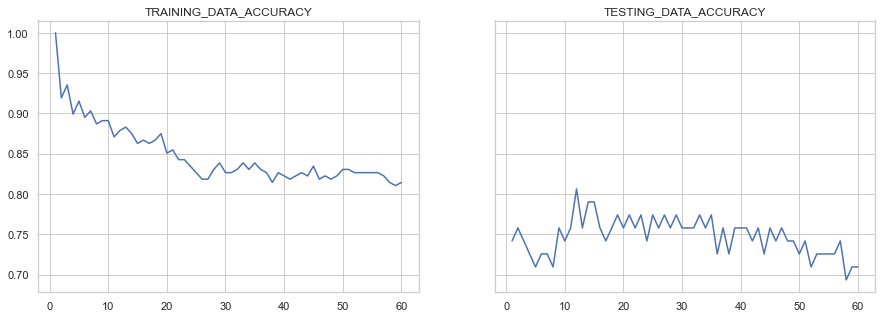

In [255]:
# Let us analyse the model using various values for n_neghbours and deduce a best value for it.

# Define arrays to store the score values of TEST Data and TRAIN Data

TRAIN_SCORE = []
TEST_SCORE = []

for k in range(1,61):
    KNN = KNeighborsClassifier(n_neighbors= k , metric = 'minkowski')
    KNN.fit(X_TRAIN,Y_TRAIN)
    TRAIN_SCORE.append(KNN.score(X_TRAIN,Y_TRAIN))
    TEST_SCORE.append(KNN.score(X_TEST,Y_TEST))
    
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

sns.lineplot(x=range(1,61),y=TRAIN_SCORE,ax=axes[0])

sns.lineplot(x=range(1,61),y=TEST_SCORE,ax=axes[1])

axes[0].set_title("TRAINING_DATA_ACCURACY")

axes[1].set_title("TESTING_DATA_ACCURACY")

plt.show()

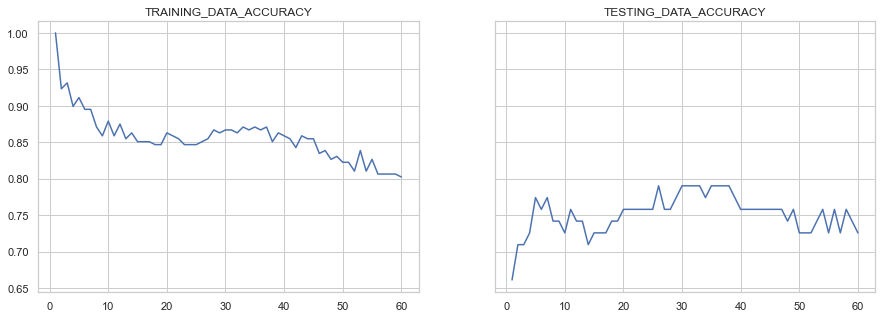

In [256]:
# Let us analyse the model using various values for n_neghbours and deduce a best value for it.

# Define arrays to store the score values of TEST Data and TRAIN Data

TRAIN_SCORE = []
TEST_SCORE = []

for k in range(1,61):
    KNN = KNeighborsClassifier(n_neighbors= k , metric = 'chebyshev')
    KNN.fit(X_TRAIN,Y_TRAIN)
    TRAIN_SCORE.append(KNN.score(X_TRAIN,Y_TRAIN))
    TEST_SCORE.append(KNN.score(X_TEST,Y_TEST))
    
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

sns.lineplot(x=range(1,61),y=TRAIN_SCORE,ax=axes[0])

sns.lineplot(x=range(1,61),y=TEST_SCORE,ax=axes[1])

axes[0].set_title("TRAINING_DATA_ACCURACY")

axes[1].set_title("TESTING_DATA_ACCURACY")

plt.show()

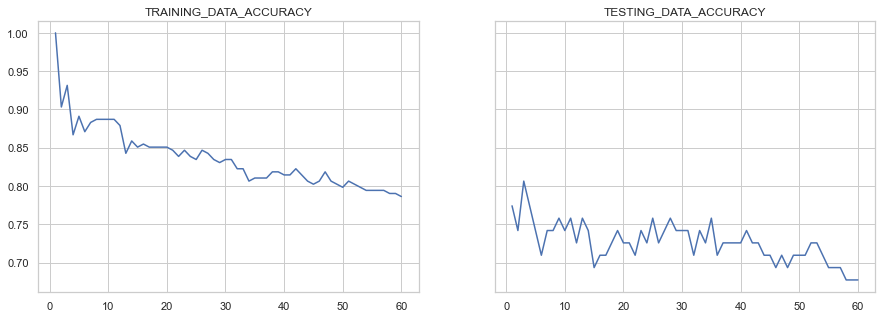

In [257]:
# Let us analyse the model using various values for n_neghbours and deduce a best value for it.

# Define arrays to store the score values of TEST Data and TRAIN Data

TRAIN_SCORE = []
TEST_SCORE = []

for k in range(1,61):
    KNN = KNeighborsClassifier(n_neighbors= k , metric = 'manhattan')
    KNN.fit(X_TRAIN,Y_TRAIN)
    TRAIN_SCORE.append(KNN.score(X_TRAIN,Y_TRAIN))
    TEST_SCORE.append(KNN.score(X_TEST,Y_TEST))
    
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

sns.lineplot(x=range(1,61),y=TRAIN_SCORE,ax=axes[0])

sns.lineplot(x=range(1,61),y=TEST_SCORE,ax=axes[1])

axes[0].set_title("TRAINING_DATA_ACCURACY")

axes[1].set_title("TESTING_DATA_ACCURACY")

plt.show()

# C. Clearly state which parameters contributed most to improve model performance.

    * Using Euclidian distance, and increasin the N neighbours, we can see that at value 15, Testing performance 
    to Training data performance is highly improved.
    
    * Using Minkowski distance, we can see that at value 13, Testing performance to Training data performance 
    is highly improved.
    
    * In Chebyshev distance, we can see that having more neighbours increased the performance of the model.
    
    * By increasing the N neighbours parameter, we can see the improvement in the performance model.
    
    * By using different distance parameter, we can see minkowski distance gave good improvement in 
    the model performance.
    
    * From the below plots we can see the performance of Training and Test data for various distance metric 
    and different number of neighbours.
    
    ** In overall tuning, we can say that at 5 neighbors and using manhattan distance, we are having the best 
    score more than 85%%

# PART B:

# DOMAIN: Banking, Marketing

# CONTEXT: A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee majority of them are liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the borrowers base rapidly to bring in more business via loan interests. A campaign that the bank ran in last quarter showed an average single digit conversion rate. Digital transformation being the core strength of the business strategy, marketing department wants to devise effective campaigns with better target marketing to increase the conversion ratio to double digit with same budget as per last campaign.

# 1. Data Understanding and Preparation:

# A. Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables.

In [258]:
DATA1 = pd.read_csv('Data1.csv')
DATA2 = pd.read_csv('Data2.csv')

In [259]:
print('DATA 1 FIRST 5 ROWS:\n',DATA1.head())
print('\n\n')
print('DATA 1 LAST 5 ROWS:\n',DATA1.tail())

DATA 1 FIRST 5 ROWS:
    ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
0   1   25              1            49    91107            4   
1   2   45             19            34    90089            3   
2   3   39             15            11    94720            1   
3   4   35              9           100    94112            1   
4   5   35              8            45    91330            4   

   MonthlyAverageSpend  Level  
0                  1.6      1  
1                  1.5      1  
2                  1.0      1  
3                  2.7      2  
4                  1.0      2  



DATA 1 LAST 5 ROWS:
         ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
4995  4996   29              3            40    92697            1   
4996  4997   30              4            15    92037            4   
4997  4998   63             39            24    93023            2   
4998  4999   65             40            49    90034            3   
4999  5000   28      

In [260]:
print('DATA 2 FIRST 5 ROWS:\n',DATA2.head())
print('\n\n')
print('DATA 2 LAST 5 ROWS:\n',DATA2.tail())

DATA 2 FIRST 5 ROWS:
    ID  Mortgage  Security  FixedDepositAccount  InternetBanking  CreditCard  \
0   1         0         1                    0                0           0   
1   2         0         1                    0                0           0   
2   3         0         0                    0                0           0   
3   4         0         0                    0                0           0   
4   5         0         0                    0                0           1   

   LoanOnCard  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  



DATA 2 LAST 5 ROWS:
         ID  Mortgage  Security  FixedDepositAccount  InternetBanking  \
4995  4996         0         0                    0                1   
4996  4997        85         0                    0                1   
4997  4998         0         0                    0                0   
4998  4999         0         0                    0                1   
4999  5000         0   

# B. Print shape and Column Names and DataTypes of both the Dataframes.

In [261]:
print('SHAE OF THE DATASET 1:',DATA1.shape)
print('\n\nCOLUMNS IN THE DATASET 1:\n\n',DATA1.columns)
print('\n\nDATA TYPES OF THE DATASET 1:\n\n',DATA1.dtypes)

SHAE OF THE DATASET 1: (5000, 8)


COLUMNS IN THE DATASET 1:

 Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object')


DATA TYPES OF THE DATASET 1:

 ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
dtype: object


In [262]:
print('SHAE OF THE DATASET 2:',DATA2.shape)
print('\n\nCOLUMNS IN THE DATASET 2:\n\n',DATA2.columns)
print('\n\nDATA TYPES OF THE DATASET 2:\n\n',DATA2.dtypes)

SHAE OF THE DATASET 2: (5000, 7)


COLUMNS IN THE DATASET 2:

 Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')


DATA TYPES OF THE DATASET 2:

 ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object


# C. Merge both the Dataframes on ‘ID’ feature to form a single DataFrame

In [263]:
BANKDATA = DATA1.merge(DATA2,left_on='ID',right_on='ID')

In [264]:
print('FIRST 5 ROWS IN BANKDATA:\n',BANKDATA.head())
print('\n\nLAST 5 ROWS IN BANKDATA:\n',BANKDATA.tail())

FIRST 5 ROWS IN BANKDATA:
    ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
0   1   25              1            49    91107            4   
1   2   45             19            34    90089            3   
2   3   39             15            11    94720            1   
3   4   35              9           100    94112            1   
4   5   35              8            45    91330            4   

   MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  \
0                  1.6      1         0         1                    0   
1                  1.5      1         0         1                    0   
2                  1.0      1         0         0                    0   
3                  2.7      2         0         0                    0   
4                  1.0      2         0         0                    0   

   InternetBanking  CreditCard  LoanOnCard  
0                0           0         NaN  
1                0           0         NaN  
2 

In [265]:
print('SHAPE OF BANK DATA:',BANKDATA.shape)
print('\n\nCOLUMNS IN THE BANK DATA:\n\n',BANKDATA.columns)
print('\n\nDATA TYPES IN THE BANK DATA:\n\n',BANKDATA.dtypes)

SHAPE OF BANK DATA: (5000, 14)


COLUMNS IN THE BANK DATA:

 Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
       'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard'],
      dtype='object')


DATA TYPES IN THE BANK DATA:

 ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object


# D. Change Datatype of below features to ‘Object’
# ‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’.

In [266]:
COL_LIST = ['HiddenScore', 'Security', 'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'Level', 'LoanOnCard']

for i in COL_LIST:
    BANKDATA[i] = BANKDATA[i].astype('category')
    
print('DATATYPES AFTER CHANGES TO BANK DATA:\n\n',BANKDATA.dtypes)

DATATYPES AFTER CHANGES TO BANK DATA:

 ID                        int64
Age                       int64
CustomerSince             int64
HighestSpend              int64
ZipCode                   int64
HiddenScore            category
MonthlyAverageSpend     float64
Level                  category
Mortgage                  int64
Security               category
FixedDepositAccount    category
InternetBanking        category
CreditCard             category
LoanOnCard             category
dtype: object


# 2. Data Exploration and Analysis:

# A. Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights.

In [267]:
BANKDATA['LoanOnCard'].value_counts()

0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64

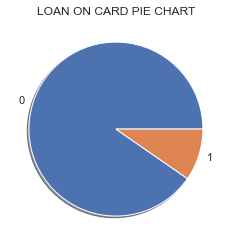

In [268]:
plt.pie(BANKDATA['LoanOnCard'].value_counts(),labels = ['0','1'], shadow = True)

plt.title("LOAN ON CARD PIE CHART")

plt.show()

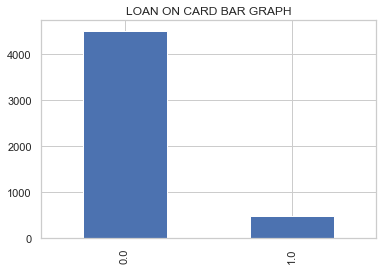

In [269]:
BANKDATA['LoanOnCard'].value_counts().plot.bar()
plt.title("LOAN ON CARD BAR GRAPH")
plt.show()

    * From the above Bar graph and Pie chart, more than 90% of the customers does not have loan on the card and mere less than 10% are having loan on the card.

# B. Check the percentage of missing values and impute if required.

In [270]:
BANKDATA.dtypes

ID                        int64
Age                       int64
CustomerSince             int64
HighestSpend              int64
ZipCode                   int64
HiddenScore            category
MonthlyAverageSpend     float64
Level                  category
Mortgage                  int64
Security               category
FixedDepositAccount    category
InternetBanking        category
CreditCard             category
LoanOnCard             category
dtype: object

In [271]:
BANKDATA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   5000 non-null   int64   
 1   Age                  5000 non-null   int64   
 2   CustomerSince        5000 non-null   int64   
 3   HighestSpend         5000 non-null   int64   
 4   ZipCode              5000 non-null   int64   
 5   HiddenScore          5000 non-null   category
 6   MonthlyAverageSpend  5000 non-null   float64 
 7   Level                5000 non-null   category
 8   Mortgage             5000 non-null   int64   
 9   Security             5000 non-null   category
 10  FixedDepositAccount  5000 non-null   category
 11  InternetBanking      5000 non-null   category
 12  CreditCard           5000 non-null   category
 13  LoanOnCard           4980 non-null   category
dtypes: category(7), float64(1), int64(6)
memory usage: 347.6 KB


In [272]:
# Check for presense of null values in the data

BANKDATA.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

    * From the above output, there are no null values present in the data except for 20 missing values 
    in the loan on card column.
    
    * Out of 5000 records, we are having only 20 rows where 1 column loan on card is having missing data
    
    * We can drop the 20 rows from the data as the count is very low and does not affect the further analysis

In [273]:
BANKDATA.dropna(axis=0,inplace=True)

In [274]:
BANKDATA.isnull().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

    * After dropping the 20 rows with null values, we can see that there are no other rows with
    null values in the data.

# C. Check for unexpected values in each categorical variable and impute with best suitable value.

In [275]:
BANKDATA['LoanOnCard'] = BANKDATA['LoanOnCard'].astype(int)
BANKDATA['LoanOnCard'] = BANKDATA['LoanOnCard'].astype('category')

In [276]:
BANKDATA['LoanOnCard'].unique()

[1, 0]
Categories (2, int64): [0, 1]

    * Earlier, LoanOnCard column has values as 1.0 and 0.0 instead of 1,0. We changed the values into 1,0 
    by converting into int and then into category. This values now are inline with the other feature columns.

# 3. Data Preparation and model building:

# A. Split data into X and Y.

    * Recommended to drop ID & ZipCode. LoanOnCard is target Variable
    
    * We are going to drop the columns ID and ZipCode to proceed further and split the data.

In [277]:
BANKDATA.drop('ID',axis=1,inplace=True)

BANKDATA.drop('ZipCode',axis=1,inplace=True)

In [278]:
BANKDATA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4980 entries, 9 to 4999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  4980 non-null   int64   
 1   CustomerSince        4980 non-null   int64   
 2   HighestSpend         4980 non-null   int64   
 3   HiddenScore          4980 non-null   category
 4   MonthlyAverageSpend  4980 non-null   float64 
 5   Level                4980 non-null   category
 6   Mortgage             4980 non-null   int64   
 7   Security             4980 non-null   category
 8   FixedDepositAccount  4980 non-null   category
 9   InternetBanking      4980 non-null   category
 10  CreditCard           4980 non-null   category
 11  LoanOnCard           4980 non-null   category
dtypes: category(7), float64(1), int64(4)
memory usage: 268.4 KB


    # We have dropped the columns ID and ZipCode from our data frame. Now we have only 12 columns
    
    # We are going to split the data into Independent variables and Dependent Variable.
    
    # We are choosing LoanOnCard as our Target Variable and split the data accordingly

In [279]:
X = BANKDATA.drop(columns='LoanOnCard') #X Contains all the independent variables from our data frame
Y = BANKDATA['LoanOnCard'] #Y contains our dependent or Target variable LoanOnCard

# B. Split data into train and test. Keep 25% data reserved for testing.

    We are now going to further split the data into train and test with 75% of data as train data and 
    remaining 25% of the data as test data.

In [280]:
# Split the data into Train and Test data with 75:25 Ratio

X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X, Y, test_size=0.25, random_state=10)

    * We have now split the data into 75% as our training data and 25% as our testing data.

# C. Train a Supervised Learning Classification base model - Logistic Regression.

    * We are using logistic regression to fit the train and test data and find accuracy of the test data.

In [281]:
LOGREG = LogisticRegression(solver='lbfgs', max_iter=2000)
LOGREG.fit(X_TRAIN, Y_TRAIN)
LOGPRED = LOGREG.predict(X_TEST)

TRAIN_ACC = LOGREG.score(X_TRAIN, Y_TRAIN)

TEST_ACC = LOGREG.score(X_TEST, Y_TEST)

print('TRAINING DATA ACCURACY:',TRAIN_ACC)
print('\n\nTESTING DATA ACCURACY:',TEST_ACC)

TRAINING DATA ACCURACY: 0.9491298527443106


TESTING DATA ACCURACY: 0.9582329317269076


    * We have 94.9% of accuracy on training data and 95.8% of accuracy on testing data.
    
    * We can say that accuracy of training data set and testing data set is more balanced.

# D. Print evaluation metrics for the model and clearly share insights.

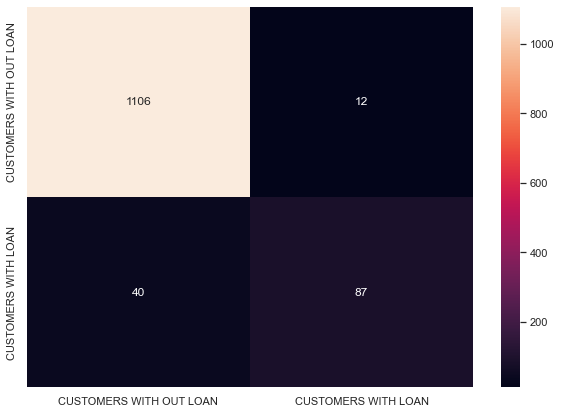

In [282]:
CNF_MTX = confusion_matrix(Y_TEST, LOGPRED, labels=[0, 1])

CNFMTX_DF = pd.DataFrame(CNF_MTX, index = [i for i in ["CUSTOMERS WITH OUT LOAN","CUSTOMERS WITH LOAN"]],
                         columns = [i for i in ["CUSTOMERS WITH OUT LOAN","CUSTOMERS WITH LOAN"]])

plt.figure(figsize = (10,7))

sns.heatmap(CNFMTX_DF, annot=True ,fmt='g')

plt.show()

    * From the above heat map, there are only 40 and 12 errors which are very less.

In [283]:
print("classification  Matrix:\n",classification_report(Y_TEST,LOGPRED))

classification  Matrix:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1118
           1       0.88      0.69      0.77       127

    accuracy                           0.96      1245
   macro avg       0.92      0.84      0.87      1245
weighted avg       0.96      0.96      0.96      1245



        * From the above metrics, we can say that the model is predicting CLASS 1 is very low compared to CLASS 0
        
        * We can say that we do not have enough samples of CLASS 1, compared to CLASS 0
        
        * Accuracy is good and recall value for CLASS 1 is very low compared to CLASS 0
        
        * We might need to do sampling on the data.

# E. Balance the data using the right balancing technique.

# i. Check distribution of the target variable
# ii. Say output is class A : 20% and class B : 80%
# iii. Here you need to balance the target variable as 50:50.
# iv. Try appropriate method to achieve the same.

In [284]:
# i. Check distribution of the target variable
print(Y_TRAIN.value_counts())

0    3382
1     353
Name: LoanOnCard, dtype: int64


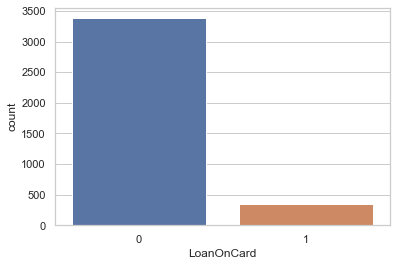

In [285]:
# Plot the target variable

sns.countplot(Y_TRAIN,label = "COUNT")

plt.show()

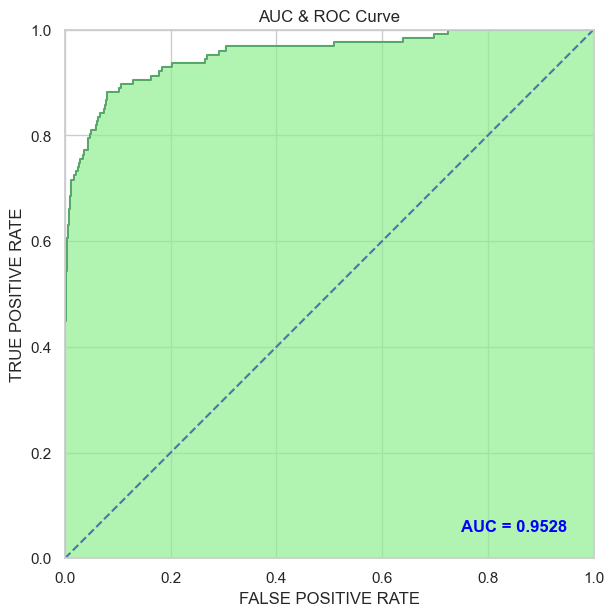

In [286]:
import sklearn.metrics as metrics

Y_SCORE = LOGREG.predict_proba(X_TEST)[:,1]

auc = metrics.roc_auc_score(Y_TEST, Y_SCORE)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(Y_TEST, Y_SCORE)

plt.figure(figsize=(7, 7), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.plot([0, 1], ls="--")
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("FALSE POSITIVE RATE")
plt.ylabel("TRUE POSITIVE RATE")
plt.show()

In [287]:
print('BEFORE SAMPLING:')
print(Y.value_counts())

BEFORE SAMPLING:
0    4500
1     480
Name: LoanOnCard, dtype: int64


    * We can see that there are 4500 records with customers not having loan and 480 customers are having loan
    which seems to be heavily imbalanced.
    
    * When the data is heavily imbalanced, the test data tends to the class which has more data and 
    more number of records.

In [288]:
from imblearn.over_sampling import RandomOverSampler

ROS = RandomOverSampler()# We are using Random over sampler method to increase the records in class 1

X_ROS, Y_ROS = ROS.fit_resample(X,Y)# To balance the target variable as 50:50 ratio

print((Y_ROS).value_counts())

0    4500
1    4500
Name: LoanOnCard, dtype: int64


    * Now the data is perfectly imbalanced as 50:50 ratio.

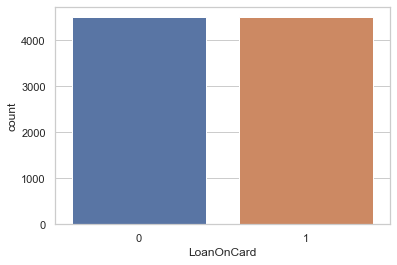

In [289]:
# Plot the target variable

sns.countplot(x = Y_ROS,label = "COUNT")

plt.show()

# F. Again train the same previous model on balanced data.

In [290]:
# Split the data into Train and Test data with 75:25 Ratio

X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X_ROS, Y_ROS, test_size=0.25, random_state=10)

In [291]:
LOGREG = LogisticRegression(solver='lbfgs', max_iter=2000)
LOGREG.fit(X_TRAIN, Y_TRAIN)
LOGPRED = LOGREG.predict(X_TEST)

TRAIN_ACC = LOGREG.score(X_TRAIN, Y_TRAIN)

TEST_ACC = LOGREG.score(X_TEST, Y_TEST)

print('TRAINING DATA ACCURACY:',TRAIN_ACC)
print('\n\nTESTING DATA ACCURACY:',TEST_ACC)

TRAINING DATA ACCURACY: 0.8951111111111111


TESTING DATA ACCURACY: 0.9004444444444445


    * After increasing the target variable to balance as 50:50, we can observe that the accuracy for test and 
    train data was decreased. But the model is still balanced.

# G. Print evaluation metrics and clearly share differences observed.

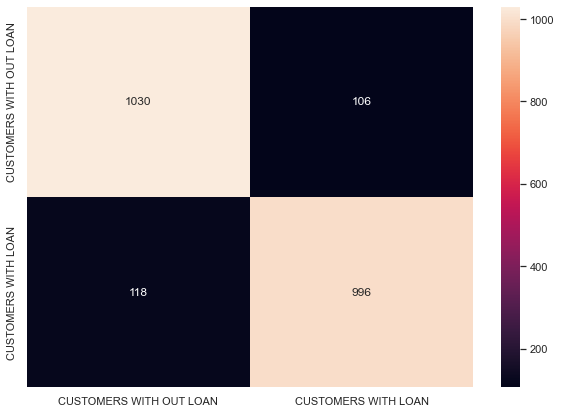

In [292]:
CNF_MTX = confusion_matrix(Y_TEST, LOGPRED, labels=[0, 1])

CNFMTX_DF = pd.DataFrame(CNF_MTX, index = [i for i in ["CUSTOMERS WITH OUT LOAN","CUSTOMERS WITH LOAN"]],
                         columns = [i for i in ["CUSTOMERS WITH OUT LOAN","CUSTOMERS WITH LOAN"]])

plt.figure(figsize = (10,7))

sns.heatmap(CNFMTX_DF, annot=True ,fmt='g')

plt.show()

In [293]:
print("classification  Matrix:\n",classification_report(Y_TEST,LOGPRED))

classification  Matrix:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90      1136
           1       0.90      0.89      0.90      1114

    accuracy                           0.90      2250
   macro avg       0.90      0.90      0.90      2250
weighted avg       0.90      0.90      0.90      2250



    * Since we have unbalanced data, we opted for over sampling the data because under sampling the data
    might cause important information to lost in identifying the test data.
    
    * By using random over sampling, we ensured that data for classes 1 and 0 are at ratio 50:50
    
    * By increasing the sample size, we can see recall value for class 1 is increased to 0.89 against 
    0.69 which is before increasing the sample size.

    * F1-score is increased for Class 1 after the sampling of data.

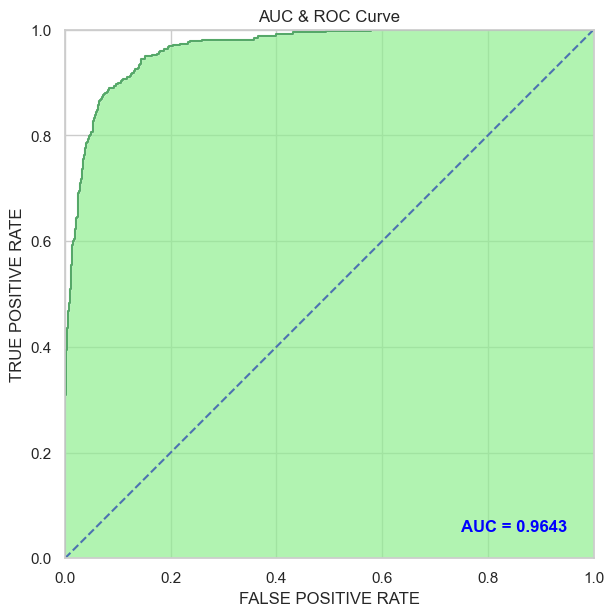

In [294]:
Y_SCORE = LOGREG.predict_proba(X_TEST)[:,1]

auc = metrics.roc_auc_score(Y_TEST, Y_SCORE)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(Y_TEST, Y_SCORE)

plt.figure(figsize=(7, 7), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.plot([0, 1], ls="--")
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("FALSE POSITIVE RATE")
plt.ylabel("TRUE POSITIVE RATE")
plt.show()

In [295]:
# In this step we try to over sample only the training data set as sampling the whole data may cause invalid test results.

X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X, Y, test_size=0.25, random_state=10)

X_TRAIN_ROS, Y_TRAIN_ROS = ROS.fit_resample(X_TRAIN,Y_TRAIN)# To balance the target variable as 50:50 ratio

print((Y_TRAIN_ROS).value_counts())

0    3382
1    3382
Name: LoanOnCard, dtype: int64


In [296]:
LOGREG = LogisticRegression(solver='lbfgs', max_iter=2000)
LOGREG.fit(X_TRAIN_ROS, Y_TRAIN_ROS)
LOGPRED = LOGREG.predict(X_TEST)

TRAIN_ACC_ROS = LOGREG.score(X_TRAIN_ROS, Y_TRAIN_ROS)

TEST_ACC_ROS = LOGREG.score(X_TEST, Y_TEST)

print('TRAINING DATA ACCURACY:',TRAIN_ACC_ROS)
print('\n\nTESTING DATA ACCURACY:',TEST_ACC_ROS)

TRAINING DATA ACCURACY: 0.8942933175635719


TESTING DATA ACCURACY: 0.8827309236947791


    * By doing over sampling on training data, we can see test data accuracy is slightly decreased.

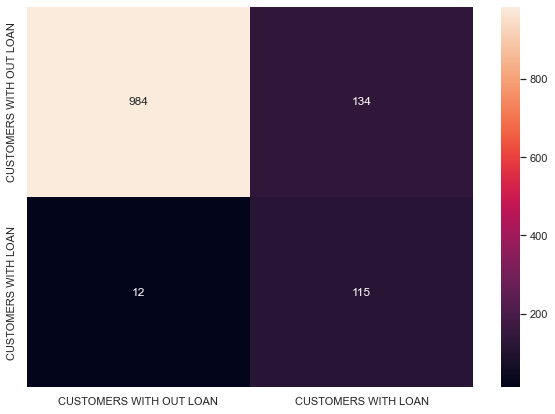

In [297]:
CNF_MTX = confusion_matrix(Y_TEST, LOGPRED, labels=[0, 1])

CNFMTX_DF = pd.DataFrame(CNF_MTX, index = [i for i in ["CUSTOMERS WITH OUT LOAN","CUSTOMERS WITH LOAN"]],
                         columns = [i for i in ["CUSTOMERS WITH OUT LOAN","CUSTOMERS WITH LOAN"]])

plt.figure(figsize = (10,7))

sns.heatmap(CNFMTX_DF, annot=True ,fmt='g')

plt.show()

In [298]:
print("classification  Matrix:\n",classification_report(Y_TEST,LOGPRED))

classification  Matrix:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93      1118
           1       0.46      0.91      0.61       127

    accuracy                           0.88      1245
   macro avg       0.72      0.89      0.77      1245
weighted avg       0.93      0.88      0.90      1245



    * By over sampling only on only training data set, we can see that precision for Class 1 is decreased.
    
    * Accuracy value is slightly decreased, F1-score for Class 1 is decreased to 0.61.

# 4. Performance Improvement:

# A. Train a base model each for SVM, KNN.

In [299]:
# USING SVM Model to fit the data with default parameters

X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X, Y, test_size=0.25, random_state=10)

SVC_MODEL = SVC()

SVC_MODEL.fit(X_TRAIN, Y_TRAIN)

print("TRAINING DATA SET ACCURACY: {:.2f}".format(SVC_MODEL.score(X_TRAIN, Y_TRAIN)))

print("\n\nTESTING DATA SET ACCURACY: {:.2f}".format(SVC_MODEL.score(X_TEST, Y_TEST)))

TRAINING DATA SET ACCURACY: 0.91


TESTING DATA SET ACCURACY: 0.90


In [300]:
X_TRAIN_ROS, Y_TRAIN_ROS = ROS.fit_resample(X_TRAIN,Y_TRAIN)# To balance the target variable as 50:50 ratio

SVC_MODEL = SVC()

SVC_MODEL.fit(X_TRAIN_ROS, Y_TRAIN_ROS)

print("TRAINING DATA SET ACCURACY AFTER RANDOM SAMPLING: {:.2f}".format(SVC_MODEL.score(X_TRAIN_ROS, Y_TRAIN_ROS)))

print("\n\nTESTING DATA SET ACCURACY AFTER RANDOM SAMPLING: {:.2f}".format(SVC_MODEL.score(X_TEST, Y_TEST)))

TRAINING DATA SET ACCURACY AFTER RANDOM SAMPLING: 0.88


TESTING DATA SET ACCURACY AFTER RANDOM SAMPLING: 0.82


In [301]:
from sklearn.preprocessing import MinMaxScaler

SCALER = MinMaxScaler()

X_TRAIN_SCALER = SCALER.fit_transform(X_TRAIN)

X_TEST_SCALER = SCALER.fit_transform(X_TEST)

SVC_MODEL.fit(X_TRAIN_SCALER,Y_TRAIN)

print("TRAINING DATA SET ACCURACY AFTER SCALING: {:.2f}".format(SVC_MODEL.score(X_TRAIN_SCALER, Y_TRAIN)))

print("\n\nTESTING DATA SET ACCURACY AFTER SCALING: {:.2f}".format(SVC_MODEL.score(X_TEST_SCALER, Y_TEST)))

TRAINING DATA SET ACCURACY AFTER SCALING: 0.98


TESTING DATA SET ACCURACY AFTER SCALING: 0.98


    * With default data split, we can see training data accuracy is 91% to testing data accuracy at 90%
    
    * On random sampling and balancing the data, we can see accuracy of training data is at 88% but testing
     data accuracy is at 82%.
     
    * On using min max scaler, the model is perfectly balanced with accuracy of 98%

In [302]:
# Trying to fit the data using KNN model with unbalanced data

KNN = KNeighborsClassifier(n_neighbors = 3)

KNN.fit(X_TRAIN, Y_TRAIN)

Y_PRED = KNN.predict(X_TEST)

print('ACCURACY SCORE AT 3 NEIGHBOURS:',accuracy_score(Y_TEST, Y_PRED))

KNN = KNeighborsClassifier(n_neighbors = 5)

KNN.fit(X_TRAIN, Y_TRAIN)

Y_PRED = KNN.predict(X_TEST)

print('\n\nACCURACY SCORE AT 5 NEIGHBOURS:',accuracy_score(Y_TEST, Y_PRED))

KNN = KNeighborsClassifier(n_neighbors = 11)

KNN.fit(X_TRAIN, Y_TRAIN)

Y_PRED = KNN.predict(X_TEST)

print('\n\nACCURACY SCORE AT 11 NEIGHBOURS:',accuracy_score(Y_TEST, Y_PRED))

KNN = KNeighborsClassifier(n_neighbors = 19)

KNN.fit(X_TRAIN, Y_TRAIN)

Y_PRED = KNN.predict(X_TEST)

print('\n\nACCURACY SCORE AT 19 NEIGHBOURS:',accuracy_score(Y_TEST, Y_PRED))

ACCURACY SCORE AT 3 NEIGHBOURS: 0.9092369477911647


ACCURACY SCORE AT 5 NEIGHBOURS: 0.908433734939759


ACCURACY SCORE AT 11 NEIGHBOURS: 0.9188755020080321


ACCURACY SCORE AT 19 NEIGHBOURS: 0.9116465863453815


In [303]:
# Trying to fit the data using KNN model with balanced data

KNN = KNeighborsClassifier(n_neighbors = 3)

KNN.fit(X_TRAIN_ROS, Y_TRAIN_ROS)

Y_PRED = KNN.predict(X_TEST)

print('ACCURACY SCORE AT 3 NEIGHBOURS:',accuracy_score(Y_TEST, Y_PRED))

KNN = KNeighborsClassifier(n_neighbors = 5)

KNN.fit(X_TRAIN_ROS, Y_TRAIN_ROS)

Y_PRED = KNN.predict(X_TEST)

print('\n\nACCURACY SCORE AT 5 NEIGHBOURS:',accuracy_score(Y_TEST, Y_PRED))

KNN = KNeighborsClassifier(n_neighbors = 11)

KNN.fit(X_TRAIN_ROS, Y_TRAIN_ROS)

Y_PRED = KNN.predict(X_TEST)

print('\n\nACCURACY SCORE AT 11 NEIGHBOURS:',accuracy_score(Y_TEST, Y_PRED))

KNN = KNeighborsClassifier(n_neighbors = 19)

KNN.fit(X_TRAIN_ROS, Y_TRAIN_ROS)

Y_PRED = KNN.predict(X_TEST)

print('\n\nACCURACY SCORE AT 19 NEIGHBOURS:',accuracy_score(Y_TEST, Y_PRED))

ACCURACY SCORE AT 3 NEIGHBOURS: 0.8899598393574297


ACCURACY SCORE AT 5 NEIGHBOURS: 0.8658634538152611


ACCURACY SCORE AT 11 NEIGHBOURS: 0.8232931726907631


ACCURACY SCORE AT 19 NEIGHBOURS: 0.8104417670682731


    * We can see accuracy of the model is above 90% at 4 neighbour values.
    
    * With balanced data, Accuracy decreased and increasing the neighbours is reducing the accuracy.

# B. Tune parameters for each of the models wherever required and finalize a model.

In [304]:
# USING SVM Model to fit the data with C = 100

SVC_MODEL = SVC(C=100.0)

SVC_MODEL.fit(X_TRAIN_ROS, Y_TRAIN_ROS)

Y_PRED = SVC_MODEL.predict(X_TEST)

print("MODEL ACCURACY WITH C = 100: {:.2f}".format(accuracy_score(Y_TEST, Y_PRED)))

print("\n\nTRAINING DATA SET ACCURACY WITH C = 100: {:.2f}".format(SVC_MODEL.score(X_TRAIN_ROS, Y_TRAIN_ROS)))

print("\n\nTESTING DATA SET ACCURACY WITH C = 100: {:.2f}".format(SVC_MODEL.score(X_TEST, Y_TEST)))

MODEL ACCURACY WITH C = 100: 0.88


TRAINING DATA SET ACCURACY WITH C = 100: 0.93


TESTING DATA SET ACCURACY WITH C = 100: 0.88


In [305]:
# USING SVM Model to fit the data with C = 500

SVC_MODEL = SVC(C=500.0)

SVC_MODEL.fit(X_TRAIN_ROS, Y_TRAIN_ROS)

Y_PRED = SVC_MODEL.predict(X_TEST)

print("MODEL ACCURACY WITH C = 500: {:.2f}".format(accuracy_score(Y_TEST, Y_PRED)))

print("\n\nTRAINING DATA SET ACCURACY WITH C = 500: {:.2f}".format(SVC_MODEL.score(X_TRAIN_ROS, Y_TRAIN_ROS)))

print("\n\nTESTING DATA SET ACCURACY WITH C = 500: {:.2f}".format(SVC_MODEL.score(X_TEST, Y_TEST)))

MODEL ACCURACY WITH C = 500: 0.91


TRAINING DATA SET ACCURACY WITH C = 500: 0.95


TESTING DATA SET ACCURACY WITH C = 500: 0.91


In [306]:
# USING SVM Model to fit the data with C = 1000

SVC_MODEL = SVC(C=1000.0)

SVC_MODEL.fit(X_TRAIN_ROS, Y_TRAIN_ROS)

Y_PRED = SVC_MODEL.predict(X_TEST)

print("MODEL ACCURACY WITH C = 1000: {:.2f}".format(accuracy_score(Y_TEST, Y_PRED)))

print("\n\nTRAINING DATA SET ACCURACY WITH C = 1000: {:.2f}".format(SVC_MODEL.score(X_TRAIN_ROS, Y_TRAIN_ROS)))

print("\n\nTESTING DATA SET ACCURACY WITH C = 1000: {:.2f}".format(SVC_MODEL.score(X_TEST, Y_TEST)))

MODEL ACCURACY WITH C = 1000: 0.92


TRAINING DATA SET ACCURACY WITH C = 1000: 0.96


TESTING DATA SET ACCURACY WITH C = 1000: 0.92


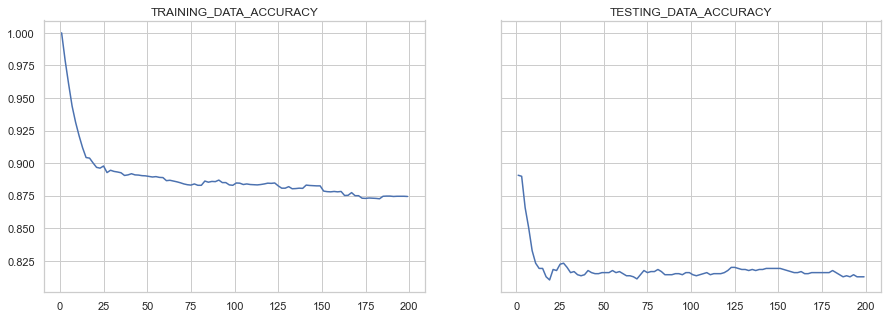

In [309]:
# Let us analyse the model using various values for n_neghbours and plot the accuracy score distribution.

# Define arrays to store the score values of TEST Data and TRAIN Data

TRAIN_SCORE = []
TEST_SCORE = []

for k in np.arange(1,201,2):
    KNN = KNeighborsClassifier(n_neighbors= k , metric = 'euclidean')
    KNN.fit(X_TRAIN_ROS,Y_TRAIN_ROS)
    TRAIN_SCORE.append(KNN.score(X_TRAIN_ROS,Y_TRAIN_ROS))
    TEST_SCORE.append(KNN.score(X_TEST,Y_TEST))
    
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

sns.lineplot(x=np.arange(1,201,2),y=TRAIN_SCORE,ax=axes[0])

sns.lineplot(x=np.arange(1,201,2),y=TEST_SCORE,ax=axes[1])

axes[0].set_title("TRAINING_DATA_ACCURACY")

axes[1].set_title("TESTING_DATA_ACCURACY")

plt.show()

    * As the neighours are increased, we can see from the above graph that accuracy of the model is decreasing.

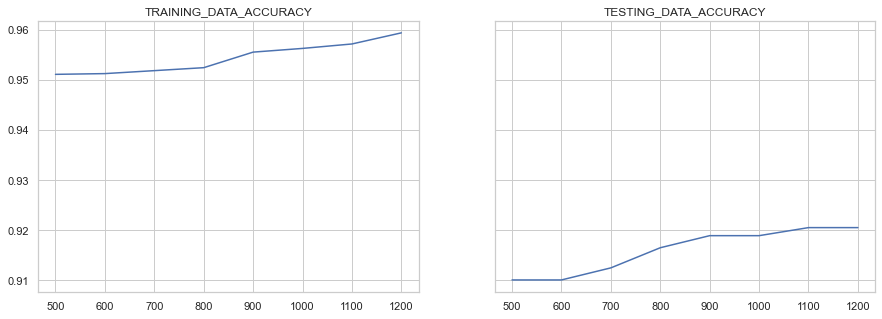

In [311]:
# USING SVM Model to fit the data with C = 1000




SVC_MODEL = SVC(C=1000.0)

SVC_MODEL.fit(X_TRAIN_ROS, Y_TRAIN_ROS)

Y_PRED = SVC_MODEL.predict(X_TEST)

TRAIN_ACC = []
TEST_ACC = []

for k in np.arange(500,1251,100):
    SVC_MODEL = SVC(C=k)
    SVC_MODEL.fit(X_TRAIN_ROS, Y_TRAIN_ROS)
    Y_PRED = SVC_MODEL.predict(X_TEST)
    TRAIN_ACC.append(SVC_MODEL.score(X_TRAIN_ROS, Y_TRAIN_ROS))
    TEST_ACC.append(SVC_MODEL.score(X_TEST, Y_TEST))
    
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

sns.lineplot(x=np.arange(500,1251,100),y=TRAIN_ACC,ax=axes[0])

sns.lineplot(x=np.arange(500,1251,100),y=TEST_ACC,ax=axes[1])

axes[0].set_title("TRAINING_DATA_ACCURACY")

axes[1].set_title("TESTING_DATA_ACCURACY")

plt.show()

    * As we increase the C value, we can see the performance improvement in the model as against in
    KNN model, where increasing the neighbours decreased the performance.
    
    * At a C value 1200, we can observe the model having more accuracy on training and test data.

In [314]:
import warnings
warnings.filterwarnings("ignore")
LR_MODEL = LogisticRegression()
KNN_MODEL = KNeighborsClassifier(n_neighbors=15)
SVM_MODEL = SVC()

COMPARE_MODELS = []
COMPARE_MODELS.append(('LR-MODEL',LR_MODEL))
COMPARE_MODELS.append(('KNN-MODEL',KNN_MODEL))
COMPARE_MODELS.append(('SVM-MODEL',SVM_MODEL))

SCORE = []
NAMES = []
scoring = 'accuracy'
for NAME, model in COMPARE_MODELS:
    print(NAME)
    RESULT = model_selection.cross_val_score(model,  X,Y, cv=10, scoring=scoring)
    SCORE.append(RESULT)
    NAMES.append(NAME)
    print('ACCURACY FOR THE MODEL:',round(RESULT.mean(),2))
    print('\n')

LR-MODEL
ACCURACY FOR THE MODEL: 0.95


KNN-MODEL
ACCURACY FOR THE MODEL: 0.91


SVM-MODEL
ACCURACY FOR THE MODEL: 0.91




In [315]:
SCORE = []
NAMES = []
scoring = 'r2'
for NAME, model in COMPARE_MODELS:
    print(NAME)
    RESULT = model_selection.cross_val_score(model,  X,Y, cv=10, scoring=scoring)
    SCORE.append(RESULT)
    NAMES.append(NAME)
    print('R-SQUARE FOR THE MODEL:',round(RESULT.mean(),2))
    print('\n')

LR-MODEL
R-SQUARE FOR THE MODEL: 0.41


KNN-MODEL
R-SQUARE FOR THE MODEL: -0.04


SVM-MODEL
R-SQUARE FOR THE MODEL: -0.05




In [182]:
SCORE = []
NAMES = []
scoring = 'precision'
for NAME, model in COMPARE_MODELS:
    print(NAME)
    RESULT = model_selection.cross_val_score(model,  X,Y, cv=10, scoring=scoring)
    SCORE.append(RESULT)
    NAMES.append(NAME)
    print('PRECISION FOR THE MODEL:',round(RESULT.mean(),2))
    print('\n')

LR-MODEL
PRECISION FOR THE MODEL: 0.82


KNN-MODEL
PRECISION FOR THE MODEL: 0.57


SVM-MODEL
PRECISION FOR THE MODEL: 0.71




In [316]:
SCORE = []
NAMES = []
scoring = 'recall'
for NAME, model in COMPARE_MODELS:
    print(NAME)
    RESULT = model_selection.cross_val_score(model,  X,Y, cv=10, scoring=scoring)
    SCORE.append(RESULT)
    NAMES.append(NAME)
    print('RECALL FOR THE MODEL:',round(RESULT.mean(),2))
    print('\n')

LR-MODEL
RECALL FOR THE MODEL: 0.61


KNN-MODEL
RECALL FOR THE MODEL: 0.26


SVM-MODEL
RECALL FOR THE MODEL: 0.1




In [318]:
SCORE = []
NAMES = []
scoring = 'f1'
for NAME, model in COMPARE_MODELS:
    print(NAME)
    RESULT = model_selection.cross_val_score(model,  X,Y, cv=10, scoring=scoring)
    SCORE.append(RESULT)
    NAMES.append(NAME)
    print('F-1 SCORE FOR THE MODEL:',round(RESULT.mean(),2))
    print('\n')

LR-MODEL
F-1 SCORE FOR THE MODEL: 0.7


KNN-MODEL
F-1 SCORE FOR THE MODEL: 0.35


SVM-MODEL
F-1 SCORE FOR THE MODEL: 0.18




In [319]:
SCORE = []
NAMES = []
scoring = 'neg_mean_absolute_error'
for NAME, model in COMPARE_MODELS:
    print(NAME)
    RESULT = model_selection.cross_val_score(model,  X,Y, cv=10, scoring=scoring)
    SCORE.append(RESULT)
    NAMES.append(NAME)
    print('MEAN ABSOLUTE ERROR FOR THE MODEL:',round(RESULT.mean(),2))
    print('\n')

LR-MODEL
MEAN ABSOLUTE ERROR FOR THE MODEL: -0.05


KNN-MODEL
MEAN ABSOLUTE ERROR FOR THE MODEL: -0.09


SVM-MODEL
MEAN ABSOLUTE ERROR FOR THE MODEL: -0.09




In [320]:
SCORE = []
NAMES = []
scoring = 'neg_mean_squared_error'
for NAME, model in COMPARE_MODELS:
    print(NAME)
    RESULT = model_selection.cross_val_score(model,  X,Y, cv=10, scoring=scoring)
    SCORE.append(RESULT)
    NAMES.append(NAME)
    print('MEAN SQUARED ERROR FOR THE MODEL:',round(RESULT.mean(),2))
    print('\n')

LR-MODEL
MEAN SQUARED ERROR FOR THE MODEL: -0.05


KNN-MODEL
MEAN SQUARED ERROR FOR THE MODEL: -0.09


SVM-MODEL
MEAN SQUARED ERROR FOR THE MODEL: -0.09




In [321]:
SCORE = []
NAMES = []
scoring = 'roc_auc'
for NAME, model in COMPARE_MODELS:
    print(NAME)
    RESULT = model_selection.cross_val_score(model,  X,Y, cv=10, scoring=scoring)
    SCORE.append(RESULT)
    NAMES.append(NAME)
    print('ROC_AUC FOR THE MODEL:',round(RESULT.mean(),2))
    print('\n')

LR-MODEL
ROC_AUC FOR THE MODEL: 0.95


KNN-MODEL
ROC_AUC FOR THE MODEL: 0.9


SVM-MODEL
ROC_AUC FOR THE MODEL: 0.92




    * From the above code blocks, we can see that LOGISTIC REGRESSION MODEL HAS SHOWN BETTER PERFORMANCE 
    IN ALL THE METRICS HAVING HIGH ACCURACY, PRECISION, F1 SCORE, RECALL.
    
    * HENCE BASED ON ALL THE METRICS, WE ARE FINALZING THE LOGISTIC REGRESSION MODEL AS OUR FINAL MODEL 
    FOR TRAINING THE DATA.

# C. Print evaluation metrics for final model.

# Evaluation metrics for the final model with unbalanced data

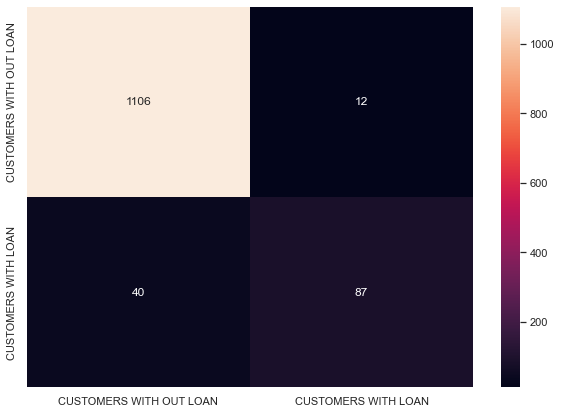

In [322]:
LOGREG = LogisticRegression(solver='lbfgs', max_iter=2000)
LOGREG.fit(X_TRAIN, Y_TRAIN)
LOGPRED = LOGREG.predict(X_TEST)

TRAIN_ACC = LOGREG.score(X_TRAIN, Y_TRAIN)

TEST_ACC = LOGREG.score(X_TEST, Y_TEST)

CNF_MTX = confusion_matrix(Y_TEST, LOGPRED, labels=[0, 1])

CNFMTX_DF = pd.DataFrame(CNF_MTX, index = [i for i in ["CUSTOMERS WITH OUT LOAN","CUSTOMERS WITH LOAN"]],
                         columns = [i for i in ["CUSTOMERS WITH OUT LOAN","CUSTOMERS WITH LOAN"]])

plt.figure(figsize = (10,7))

sns.heatmap(CNFMTX_DF, annot=True ,fmt='g')

plt.show()

In [323]:
print("classification  Matrix:\n",classification_report(Y_TEST,LOGPRED))

classification  Matrix:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1118
           1       0.88      0.69      0.77       127

    accuracy                           0.96      1245
   macro avg       0.92      0.84      0.87      1245
weighted avg       0.96      0.96      0.96      1245



# Evaluation metrics for the final model with balanced data

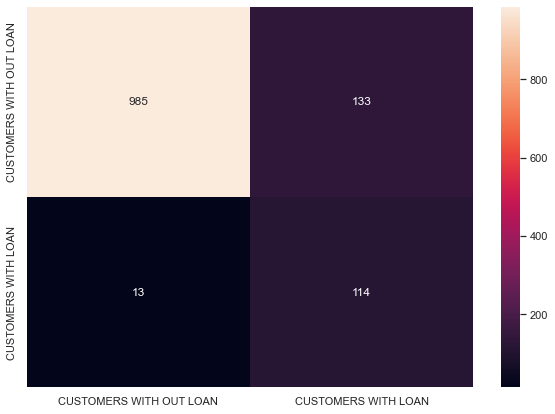

In [324]:
LOGREG = LogisticRegression(solver='lbfgs', max_iter=2000)

X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X, Y, test_size=0.25, random_state=10)

X_TRAIN_ROS, Y_TRAIN_ROS = ROS.fit_resample(X_TRAIN,Y_TRAIN)# To balance the target variable as 50:50 ratio

LOGREG.fit(X_TRAIN_ROS, Y_TRAIN_ROS)

LOGPRED = LOGREG.predict(X_TEST)

TRAIN_ACC = LOGREG.score(X_TRAIN_ROS, Y_TRAIN_ROS)

TEST_ACC = LOGREG.score(X_TEST, Y_TEST)

CNF_MTX = confusion_matrix(Y_TEST, LOGPRED, labels=[0, 1])

CNFMTX_DF = pd.DataFrame(CNF_MTX, index = [i for i in ["CUSTOMERS WITH OUT LOAN","CUSTOMERS WITH LOAN"]],
                         columns = [i for i in ["CUSTOMERS WITH OUT LOAN","CUSTOMERS WITH LOAN"]])

plt.figure(figsize = (10,7))

sns.heatmap(CNFMTX_DF, annot=True ,fmt='g')

plt.show()

In [325]:
print("classification  Matrix:\n",classification_report(Y_TEST,LOGPRED))

classification  Matrix:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93      1118
           1       0.46      0.90      0.61       127

    accuracy                           0.88      1245
   macro avg       0.72      0.89      0.77      1245
weighted avg       0.93      0.88      0.90      1245



# D. Share improvement achieved from base model to final model.

    * Based on the cross validations of all the models, we are selecting Logistic Regression as our final model.
    
    * Logistic Regression model is not affected by over fitting of the data.
    
    * It has good recall value as compared to other models.
    
    * It has good accuracy value both in case of unbalanced and balanced data.
    
    * It is alwasy good to have the balanced data to train the model to avoid test data point to major class
    
    * On increasing the sampling on test data, model can predict the data with minor class as well.
    
    * F-1 Score is increased in Class 1 which is of minority class after over fitting the data.
    
    * There are less data where it points to customer having loan on card, but they doesn't have card.